In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [121]:
bank_pca = pd.read_csv('bank_transactions.csv')
bank_pca.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [122]:
from datetime import datetime, date

bank_pca['TransactionDate'] = pd.to_datetime(bank_pca['TransactionDate'], format='mixed')
bank_pca['TransactionDate'] = bank_pca['TransactionDate'].apply(lambda x: x - pd.DateOffset(years=100) if x > datetime.now() else x)

In [123]:
bank_pca.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [124]:
bank_pca['TransactionYear'] = bank_pca['TransactionDate'].dt.year
bank_pca.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016


In [125]:
bank_pca['CustomerDOB'] = pd.to_datetime(bank_pca['CustomerDOB'], format='mixed')
bank_pca['CustomerDOB'] = bank_pca['CustomerDOB'].apply(lambda x: x - pd.DateOffset(years=100) if x > datetime.now() else x)
bank_pca['CustomerYear'] = bank_pca['CustomerDOB'].dt.year
bank_pca.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerYear
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,1994.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016,1957.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,1996.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,1973.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,1988.0


In [126]:
bank_pca['CustomerAge'] = bank_pca['TransactionYear'] - bank_pca['CustomerYear']
bank_pca.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerYear,CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,1994.0,22.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016,1957.0,59.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,1996.0,20.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,1973.0,43.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,1988.0,28.0


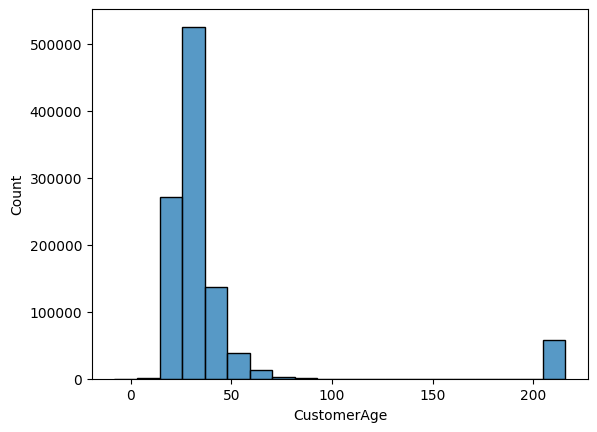

In [127]:
sns.histplot(data=bank_pca,x='CustomerAge',bins=20)
plt.show()

In [128]:
bank_pca = bank_pca[bank_pca.CustomerAge < 100]
bank_pca = bank_pca[bank_pca.CustomerAge > 0]

bank_pca.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerYear,CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,1994.0,22.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016,1957.0,59.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,1996.0,20.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,1973.0,43.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,1988.0,28.0


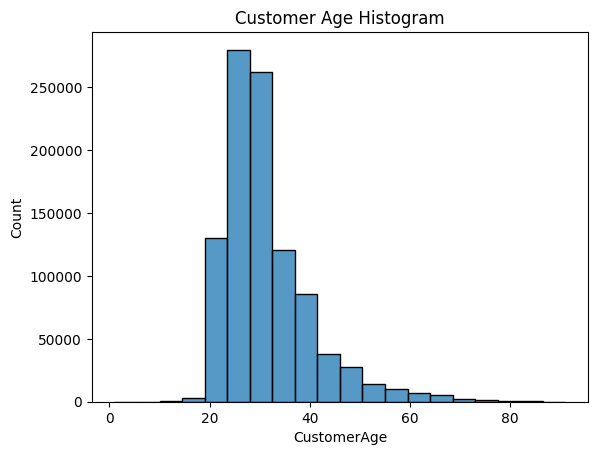

In [129]:
sns.histplot(data=bank_pca,x='CustomerAge',bins=20)
plt.title('Customer Age Histogram')
plt.show()

In [130]:
bank_pca = bank_pca[(bank_pca['CustAccountBalance'] - bank_pca['TransactionAmount (INR)']) > 0]

In [131]:
bank_pca.isna().sum()

TransactionID                0
CustomerID                   0
CustomerDOB                  0
CustGender                 135
CustLocation               140
CustAccountBalance           0
TransactionDate              0
TransactionTime              0
TransactionAmount (INR)      0
TransactionYear              0
CustomerYear                 0
CustomerAge                  0
dtype: int64

In [132]:
bank_pca = bank_pca.dropna()

In [ ]:
bank_pca.drop(['CustomerDOB','TransactionID','CustomerID','CustLocation','TransactionDate','TransactionYear', 'CustomerYear'],axis=1,inplace=True)
bank_pca.head()

,CustGender,CustAccountBalance,TransactionTime,TransactionAmount (INR),CustomerAge
0,F,17819.05,143207,25.0,22.0
2,F,17874.44,142712,459.0,20.0
3,F,866503.21,142714,2060.0,43.0
4,F,6714.43,181156,1762.5,28.0
5,F,53609.20,173940,676.0,44.0
